# **Australia Rain Prediction**
**Project Type- Supervised Learning(Classification)**

**Contribution-  Individual**

**Name- Vikash Kumar Diwakar**

# **Project Workflow:**

* **Importing Neccessary Libraries**

* **Data Wrangling**

1. Gathering Data
    - CSV and others files
    - APIs
    - Web Scraping
    - Databases
2. Assessing Data
3. Cleaning Data
* **EDA and Features Engineering on features**

* **Features Transformation and selection**

* **Remove Multicollinearity**

* **model implementation and pre-processing**

1. Train, Test and Split
2. preprocessing using column-transformer

* **Fitting the regression models and HyperParameter Tuning**

* **Final selection of the model**

* **Conclusion**

# **Problem Statement**

Weather forecasting is the application of science and technology to predict the
conditions of the atmosphere for a given location and time. Weather forecasts
are made by collecting quantitative data about the current state of the
atmosphere at a given place and using meteorology to project how the atmosphere
will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset
contains about 10 years of daily weather observations of different locations in
Australia. Here, predict two things:

**Design a predictive model with the use of machine learning algorithms to
forecast whether or not it will rain tomorrow.**

Dataset Description:

Number of columns: 23

`Date` - The date of observation

`Location` -The common name of the location of the weather station

`MinTemp` -The minimum temperature in degrees celsius

`MaxTemp` -The maximum temperature in degrees celsius

`Rainfall` -The amount of rainfall recorded for the day in mm

`Evaporation` -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

`Sunshine` -The number of hours of bright sunshine in the day.

`WindGustDir`- The direction of the strongest wind gust in the 24 hours to midnight

`WindGustSpeed` -The speed (km/h) of the strongest wind gust in the 24 hours to
midnight.

`WindDir9am` -Direction of the wind at 9am

`WindDir3pm` -Direction of the wind at 3pm

`WindSpeed9am` -Wind speed (km/hr) averaged over 10 minutes prior to 9am

`WindSpeed3pm` -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

`Humidity9am` -Humidity (percent) at 9am

`Humidity3pm` -Humidity (percent) at 3pm

`Pressure9am` -Atmospheric pressure (hpa) reduced to mean sea level at 9am

`Pressure3pm` -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

`Cloud9am` - Fraction of sky obscured by cloud at 9am.

`Cloud3pm` -Fraction of sky obscured by cloud

`Temp9am`-Temperature (degrees C) at 9am

`Temp3pm` -Temperature (degrees C) at 3pm

`RainToday` -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm,
otherwise 0

`RainTomorrow` -The amount of next day rain in mm. Used to create response
variable . A kind of measure of the "risk".



In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [2]:
# loading and reading the firsft 5 rows
df=pd.read_csv('/content/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# viewing info and datatypes of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [4]:
# describing numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


In [5]:
# fetching total null values per column
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

There are lot of null values present we need to fill them accordingly.

In [6]:
# displaying all columns
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# **Data Wrangling**

# **`MinTemp`**

<Axes: xlabel='MinTemp', ylabel='Count'>

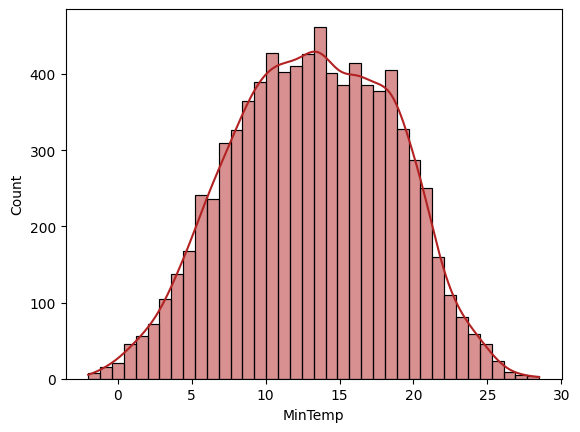

In [7]:
import seaborn as sns
sns.histplot(df['MinTemp'],kde=True,color='firebrick')

In [8]:
df['MinTemp']=df['MinTemp'].replace(np.nan,0.1)

# **`MaxTemp`**

<Axes: xlabel='MaxTemp', ylabel='Count'>

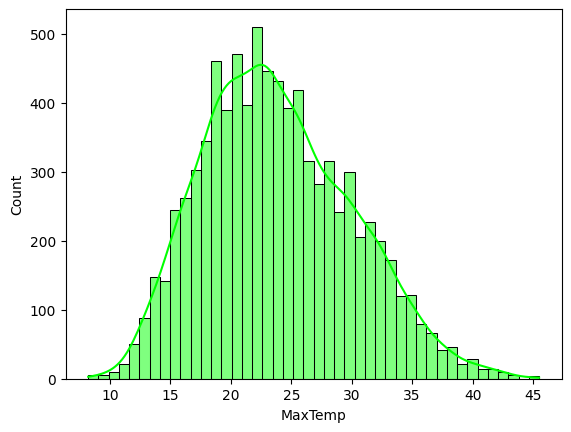

In [9]:
sns.histplot(df['MaxTemp'],kde=True,color='lime')

In [10]:
df['MaxTemp'].fillna(df['MaxTemp'].median(),inplace=True)

In [11]:
df.sample(1)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6857,2014-10-15,Adelaide,5.1,18.0,0.0,3.0,NaN,W,31.0,WSW,...,49.0,39.0,1026.4,1023.6,NaN,NaN,13.1,17.0,No,No


# **`Rainfall`**

In [12]:
df['Rainfall'].value_counts()

Rainfall
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: count, Length: 250, dtype: int64

<Axes: xlabel='Rainfall', ylabel='Count'>

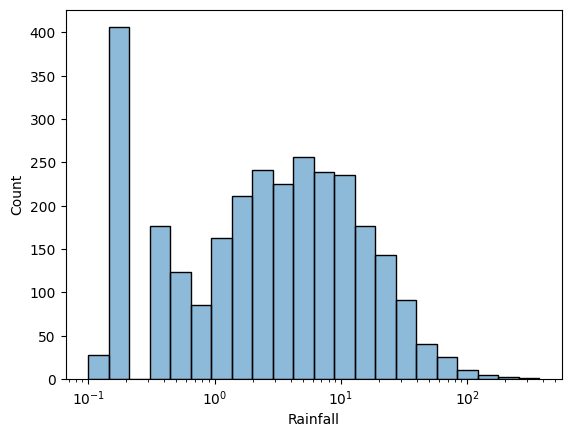

In [13]:
sns.histplot(x='Rainfall',data=df,kde=True,log_scale=True)

In [14]:
df[df['Rainfall'].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
15,2008-12-16,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,...,50.0,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,No
284,2009-09-11,Albury,0.1,18.8,NaN,NaN,NaN,N,31.0,SE,...,83.0,46.0,1022.2,1018.2,NaN,NaN,8.7,18.1,NaN,No
436,2010-02-10,Albury,21.7,35.6,NaN,NaN,NaN,SSW,46.0,NaN,...,64.0,28.0,1018.8,1014.7,NaN,4.0,25.2,32.9,NaN,No
438,2010-02-12,Albury,22.5,29.1,NaN,NaN,NaN,SW,24.0,NaN,...,81.0,67.0,1008.5,1007.8,NaN,7.0,23.4,26.4,NaN,No
444,2010-02-18,Albury,0.1,31.2,NaN,NaN,NaN,ESE,31.0,SSE,...,33.0,24.0,1020.4,1019.1,NaN,NaN,21.0,30.0,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6496,2012-02-01,Brisbane,23.6,30.0,NaN,6.8,11.5,E,31.0,ENE,...,69.0,67.0,1007.5,1005.2,3.0,5.0,27.8,28.1,NaN,No
6881,2014-11-08,Adelaide,21.3,21.9,NaN,NaN,NaN,SW,41.0,SW,...,61.0,47.0,1017.1,1020.3,NaN,NaN,21.4,19.9,NaN,No
6909,2014-12-06,Adelaide,16.4,23.7,NaN,NaN,NaN,S,43.0,S,...,63.0,50.0,1012.1,1010.6,NaN,NaN,18.8,21.6,NaN,NaN
6910,2014-12-07,Adelaide,15.8,25.3,NaN,NaN,NaN,WSW,37.0,S,...,67.0,51.0,1008.8,1007.0,NaN,NaN,19.1,24.2,NaN,No


In [15]:
df['Rainfall']=df['Rainfall'].fillna(0)

In [16]:
df[df['Rainfall']==0]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [17]:
mean_rainfall=round(df[~df['Rainfall'].isnull()]['Rainfall'].mean(),1)
mean_rainfall

2.7

In [18]:
df['Rainfall']=df['Rainfall'].replace(0,mean_rainfall)

# **`Evaporation`**

<Axes: xlabel='Evaporation', ylabel='Count'>

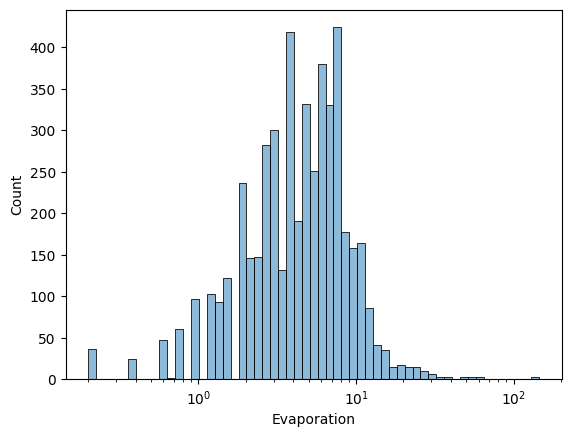

In [19]:
sns.histplot(df['Evaporation'],kde=True,log_scale=True)

In [20]:
df['Evaporation']=df['Evaporation'].fillna(0)

In [21]:
mean_eva=round(df[~df['Evaporation'].isnull()]['Evaporation'].mean(),1)
median_eva=df[~df['Evaporation'].isnull()]['Evaporation'].median()

In [22]:
[mean_eva,median_eva]

[3.1, 1.8]

In [23]:
df['Evaporation']=df['Evaporation'].replace(0,mean_eva)

# **`Sunshine`**

In [24]:
df['Sunshine'].unique()

array([ nan,  9. ,  3.4,  6.1, 11. ,  7.1,  2.8,  6.7,  6.4,  6. ,  9.4,
        6.3, 11.1, 11.2, 11.4,  9.7,  7.9,  0.3,  0. ,  0.5,  3.5,  1.9,
        1.1,  7.8,  8.8,  1.8,  6.6,  3.1,  3. , 10.4, 10.5,  9.9,  9.5,
        1. ,  4.3,  9.2,  9.8,  4.8,  8.9,  4.5,  2.6, 10. , 10.2,  9.1,
        2.2,  0.4,  0.7,  0.2,  2.7,  8.5,  3.6,  2.5,  6.9,  8.2,  6.8,
        7.2,  9.6,  5.1,  5.8,  1.6,  0.6,  7.7,  8.3,  2.9,  8.4,  4.2,
        9.3,  4.7,  4.1,  5.3,  7.4,  7.3,  2.4, 10.6, 10.3, 10.1,  2.3,
       10.7,  8.6,  5.2, 10.9, 10.8,  8. ,  1.5,  8.7, 11.3, 11.5,  5.7,
       11.9,  3.3, 12.1, 12.4,  7. ,  4. , 11.7, 12.7, 12.5, 12.6, 13. ,
        5.5, 12.2, 11.6, 12.9, 13.1,  5.4,  3.7, 12. ,  2. ,  8.1, 13.2,
       13.6, 12.3, 11.8,  7.5,  6.2,  1.2,  3.8,  1.4,  5. ,  0.8,  4.4,
        6.5,  0.1,  4.9,  3.9,  4.6,  0.9,  5.9,  7.6,  1.3, 12.8, 13.4,
        1.7, 13.3,  3.2,  2.1, 13.5, 13.8, 13.9, 13.7,  5.6])

<Axes: xlabel='Sunshine', ylabel='Count'>

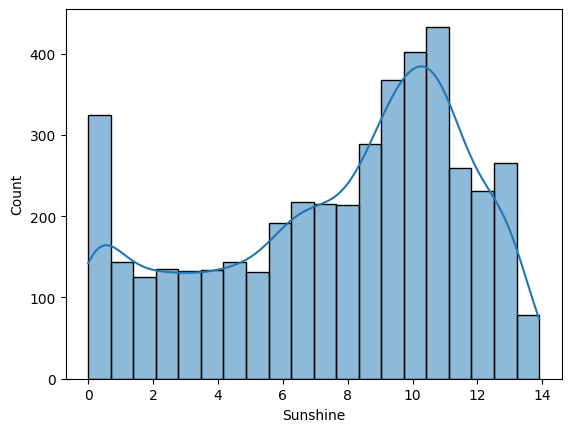

In [25]:
sns.histplot(df['Sunshine'],kde=True)

In [26]:
df['Sunshine']=df['Sunshine'].fillna(0)

In [27]:
mean_sun=round(df[~df['Sunshine'].isnull()]['Sunshine'].mean(),1)
median_sun=df[~df['Sunshine'].isnull()]['Sunshine'].median()

In [28]:
[mean_sun,median_sun]

[4.0, 0.2]

In [29]:
df['Sunshine']=df['Sunshine'].replace(0,mean_sun)

# **`WindGustDir`**

<Axes: xlabel='count', ylabel='WindGustDir'>

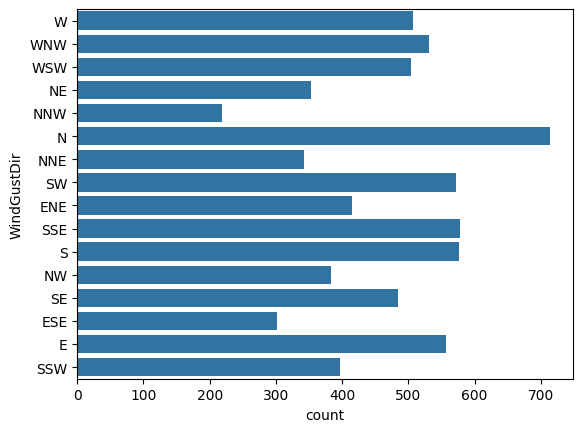

In [30]:
sns.countplot(df['WindGustDir'])

In [31]:
df['WindGustDir'].value_counts()

WindGustDir
N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: count, dtype: int64

In [32]:
df.sample(1)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
7388,2012-03-28,PerthAirport,13.5,30.8,2.7,5.8,11.0,ESE,41.0,ESE,...,57.0,29.0,1021.1,1016.8,1.0,1.0,21.6,30.0,No,No


In [33]:
median_WindGustDir=df[~df['WindGustDir'].isnull()]['WindGustDir'].mode()[0]
median_WindGustDir

'N'

In [34]:
df['WindGustDir']=df['WindGustDir'].fillna(median_WindGustDir)

# **`WindGustSpeed`**

In [35]:
df['WindGustSpeed'].isnull().sum()

991

In [36]:
df['WindGustSpeed'].unique()

array([ 44.,  46.,  24.,  41.,  56.,  50.,  35.,  80.,  28.,  30.,  31.,
        61.,  nan,  22.,  63.,  43.,  26.,  33.,  57.,  48.,  39.,  37.,
        52.,  98.,  54.,  83.,  59.,  70.,  69.,  17.,  20.,  19.,  15.,
        13.,  11.,  72.,  85.,  65.,  78., 107.,  74.,  67.,  94.,  76.,
        81.,  87.,   9.,  93.,   7.,  91.,  89., 102., 100.])

<Axes: xlabel='WindGustSpeed', ylabel='Count'>

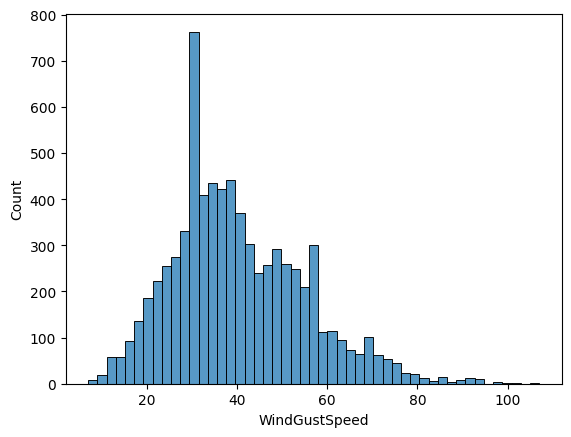

In [37]:
sns.histplot(df['WindGustSpeed'])

In [38]:
mean_speed=round(df[~df['WindGustSpeed'].isnull()]['WindGustSpeed'].mean(),1)
median_speed=df[~df['WindGustSpeed'].isnull()]['WindGustSpeed'].median()

In [39]:
[mean_speed,median_speed]

[40.2, 39.0]

In [40]:
df['WindGustSpeed']=df['WindGustSpeed'].fillna(median_speed)

# **`WindDir9am`**

In [41]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [42]:
WindDir9am_mode=df[~df['WindDir9am'].isnull()]['WindDir9am'].mode()[0]

In [43]:
df['WindDir9am']=df['WindDir9am'].fillna(WindDir9am_mode)

# **`WindDir3pm`**

In [44]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [45]:
WindDir3pm_mode=df[~df['WindDir9am'].isnull()]['WindDir9am'].mode()[0]
WindDir3pm_mode

'N'

In [46]:
df['WindDir3pm']=df['WindDir3pm'].fillna(WindDir3pm_mode)

# **`WindSpeed9am`**

In [47]:
df['WindSpeed9am'].unique()

array([20.,  4., 19., 11.,  7.,  6., 15., 17., 28., 24., nan,  9.,  0.,
       13.,  2., 26., 30., 22., 35., 37., 31., 33., 43., 41., 46., 39.,
       56., 54., 50., 52., 44., 61., 57., 48., 63.])

In [48]:
df['WindSpeed9am']=df['WindSpeed9am'].fillna(0)

In [49]:
df['WindSpeed9am'].unique()

array([20.,  4., 19., 11.,  7.,  6., 15., 17., 28., 24.,  0.,  9., 13.,
        2., 26., 30., 22., 35., 37., 31., 33., 43., 41., 46., 39., 56.,
       54., 50., 52., 44., 61., 57., 48., 63.])

<Axes: xlabel='WindSpeed9am', ylabel='Count'>

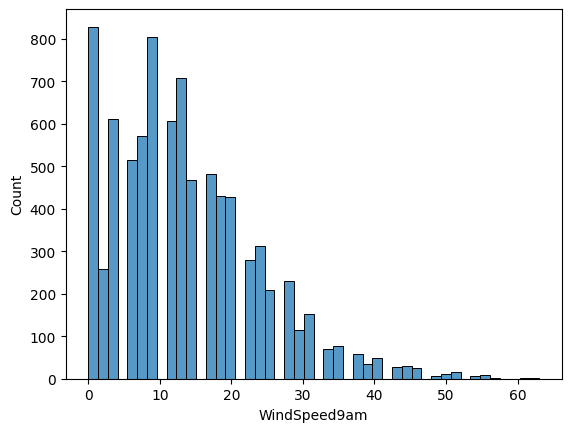

In [50]:
sns.histplot(df['WindSpeed9am'])

In [51]:
mean_WindSpeed9am=round(df[~df['WindSpeed9am'].isnull()]['WindSpeed9am'].mean(),1)
median_WindSpeed9am=df[~df['WindSpeed9am'].isnull()]['WindSpeed9am'].median()

In [52]:
[mean_WindSpeed9am,median_WindSpeed9am]

[13.7, 13.0]

In [53]:
df['WindSpeed9am']=df['WindSpeed9am'].replace(0,mean_WindSpeed9am)

In [54]:
df['WindSpeed9am'].unique()

array([20. ,  4. , 19. , 11. ,  7. ,  6. , 15. , 17. , 28. , 24. , 13.7,
        9. , 13. ,  2. , 26. , 30. , 22. , 35. , 37. , 31. , 33. , 43. ,
       41. , 46. , 39. , 56. , 54. , 50. , 52. , 44. , 61. , 57. , 48. ,
       63. ])

<Axes: xlabel='WindSpeed9am', ylabel='Count'>

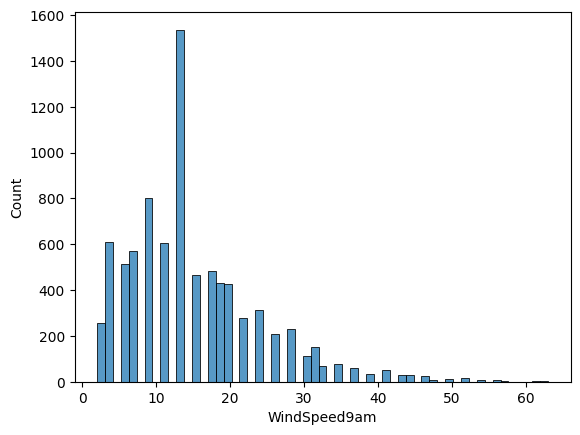

In [55]:
sns.histplot(df['WindSpeed9am'])

# **`WindSpeed3pm`**

In [56]:
df['WindSpeed3pm'].unique()

array([24., 22., 26.,  9., 20., 17., 28., 11.,  6., 13., 30., 19., 31.,
        7., 15., 48.,  4., 33.,  0.,  2., nan, 37., 46., 39., 50., 35.,
       41., 44., 43., 65., 56., 83., 54., 61., 57., 52.])

<Axes: xlabel='WindSpeed3pm', ylabel='Count'>

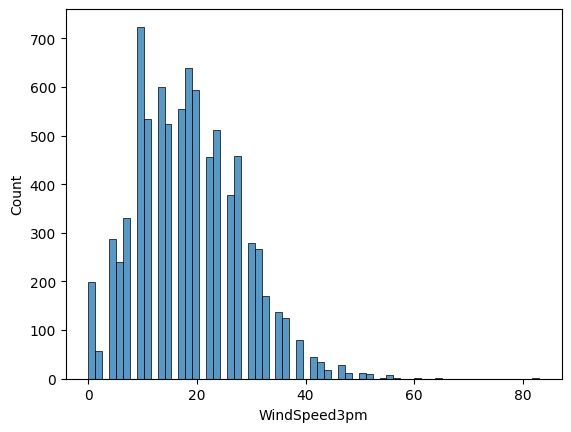

In [57]:
sns.histplot(df['WindSpeed3pm'])

In [58]:
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(0)

In [59]:
df['WindSpeed3pm'].unique()

array([24., 22., 26.,  9., 20., 17., 28., 11.,  6., 13., 30., 19., 31.,
        7., 15., 48.,  4., 33.,  0.,  2., 37., 46., 39., 50., 35., 41.,
       44., 43., 65., 56., 83., 54., 61., 57., 52.])

In [60]:
mean_WindSpeed3pm=round(df[~df['WindSpeed3pm'].isnull()]['WindSpeed3pm'].mean(),1)
median_WindSpeed3pm=df[~df['WindSpeed3pm'].isnull()]['WindSpeed3pm'].median()

In [61]:
[mean_WindSpeed3pm,median_WindSpeed3pm]

[18.3, 19.0]

In [62]:
df['WindSpeed3pm']=df['WindSpeed3pm'].replace(0,median_WindSpeed3pm)

<Axes: xlabel='WindSpeed3pm', ylabel='Count'>

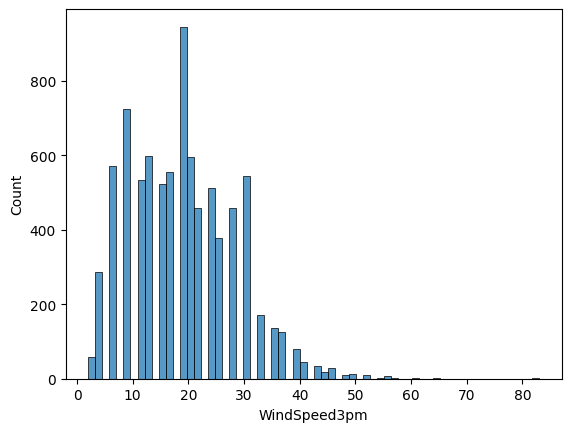

In [63]:
sns.histplot(df['WindSpeed3pm'])

# **`Humidity9am`**

In [64]:
df['Humidity9am'].unique()

array([ 71.,  44.,  38.,  45.,  82.,  55.,  49.,  48.,  42.,  58.,  89.,
        76.,  65.,  57.,  50.,  69.,  80.,  47.,  56.,  54.,  41.,  78.,
        46.,  43.,  33.,  34.,  36.,  52.,  51.,  40.,  35.,  39.,  60.,
        37.,  27.,  32.,  53.,  20.,  66.,  63.,  62.,  87.,  61.,  59.,
        92.,  72.,  67.,  75.,  88.,  68.,  73.,  74.,  83.,  77.,  70.,
        81.,  86.,  97.,  99.,  91.,  85.,  93.,  84.,  94.,  79.,  98.,
        96.,  95.,  90.,  64.,  29.,  21., 100.,  30.,  23.,  nan,  31.,
        22.,  28.,  25.,  16.,  19.,  17.,  18.,  14.,  10.,  12.,  11.,
        24.,  26.,  15.])

<Axes: xlabel='Humidity9am', ylabel='Count'>

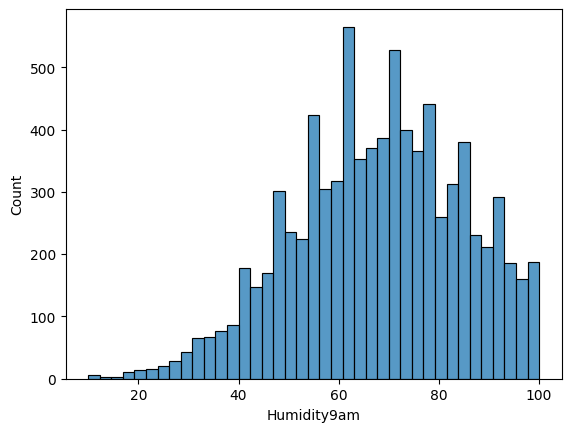

In [65]:
sns.histplot(df['Humidity9am'])

In [66]:
mean_Humidity9am=round(df[~df['Humidity9am'].isnull()]['Humidity9am'].mean(),1)
median_Humidity9am=df[~df['Humidity9am'].isnull()]['Humidity9am'].median()

In [67]:
[mean_Humidity9am,median_Humidity9am]

[67.8, 68.0]

In [68]:
df['Humidity9am']=df['Humidity9am'].fillna(median_Humidity9am)

In [69]:
df['Humidity9am'].unique()

array([ 71.,  44.,  38.,  45.,  82.,  55.,  49.,  48.,  42.,  58.,  89.,
        76.,  65.,  57.,  50.,  69.,  80.,  47.,  56.,  54.,  41.,  78.,
        46.,  43.,  33.,  34.,  36.,  52.,  51.,  40.,  35.,  39.,  60.,
        37.,  27.,  32.,  53.,  20.,  66.,  63.,  62.,  87.,  61.,  59.,
        92.,  72.,  67.,  75.,  88.,  68.,  73.,  74.,  83.,  77.,  70.,
        81.,  86.,  97.,  99.,  91.,  85.,  93.,  84.,  94.,  79.,  98.,
        96.,  95.,  90.,  64.,  29.,  21., 100.,  30.,  23.,  31.,  22.,
        28.,  25.,  16.,  19.,  17.,  18.,  14.,  10.,  12.,  11.,  24.,
        26.,  15.])

<Axes: xlabel='Humidity9am', ylabel='Count'>

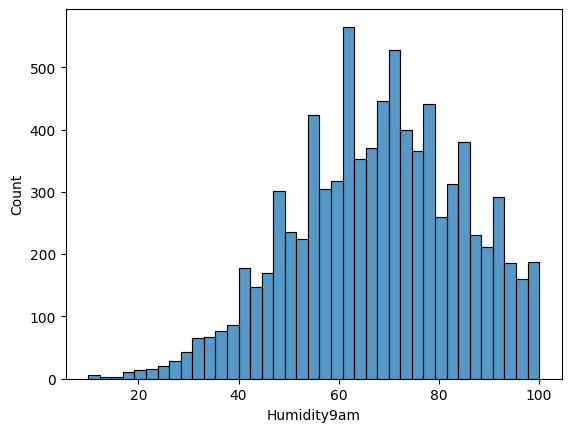

In [70]:
sns.histplot(df['Humidity9am'])

# **`Humidity3pm`**

In [71]:
df['Humidity3pm'].unique()

array([22., 25., 30., 16., 33., 23., 19.,  9., 27., 91., 93., 43., 32.,
       28., 82., 65., 26., 24., 17., 15., 70., 12.,  8., 31., 20., 10.,
       21., 39., 13., 11., 69., 18., 14., 35., 90., 68., 74., 41., 34.,
       78., 49., 37., 42., 47., 52., 29., 86., 89., 62., 79., 48., 46.,
       38., 44., 51., 36., 45., 40., 53., 61., 59., 63., 54., 57., 50.,
       58., 75., 97., 80., 95., 56., 72., 60., 71., 73., 81., 76., 64.,
       87., 85., 67., 55., 77., 84.,  7., 99., 92., 66., 83., 94., 96.,
       88., nan, 98.,  6.])

<Axes: xlabel='Humidity3pm', ylabel='Count'>

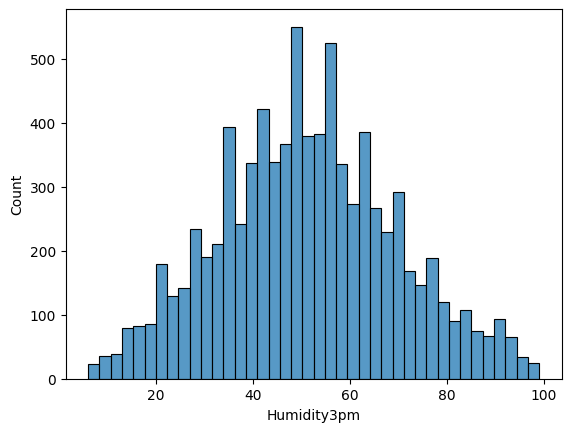

In [72]:
sns.histplot(df['Humidity3pm'])

In [73]:
mean_Humidity3pm=round(df[~df['Humidity3pm'].isnull()]['Humidity3pm'].mean(),1)
mean_Humidity3pm

51.2

In [74]:
df['Humidity3pm']=df['Humidity3pm'].fillna(mean_Humidity3pm)

# **`Pressure9am`**

In [75]:
df['Pressure9am'].unique()

array([1007.7, 1010.6, 1007.6, 1017.6, 1010.8, 1009.2, 1009.6, 1013.4,
       1008.9, 1007. , 1011.8, 1010.5,  994.3, 1001.2, 1009.7, 1012.2,
       1005.8, 1009.4, 1019.2, 1019.3, 1013.6, 1007.8, 1011. , 1012.9,
       1010.9, 1006.8, 1005.2, 1004.8, 1005.6, 1006.1, 1004.5, 1014.4,
       1018.7, 1015.1, 1012.6, 1011.9, 1017.8, 1009.9, 1014.1, 1015.7,
       1011.6, 1008.4, 1019.7, 1015.8, 1010.1, 1005.3, 1007.9, 1005.4,
       1016.5, 1017.7, 1014.9, 1014.6, 1014.2, 1012.5, 1011.7, 1008.8,
       1005.9, 1008. , 1008.2, 1009.3, 1012.8, 1017. , 1023.3, 1022.5,
       1016.2, 1017.2, 1012.4, 1015.6, 1013. , 1014. , 1016.6, 1007.5,
       1014.7, 1014.5, 1013.7, 1015.2, 1019.5, 1021.3, 1017.4, 1012.7,
       1013.3, 1016.3, 1014.8, 1019.1, 1023. , 1023.8, 1022.4, 1023.2,
       1022.6, 1018.8, 1019.8, 1020.4, 1021.8, 1026.7, 1027.1, 1024.2,
       1021.5, 1024.4, 1024.1, 1018.5, 1022.8, 1022.7, 1023.6, 1025.2,
       1026. , 1004. , 1013.8, 1018. , 1023.1, 1023.4, 1026.9, 1028.7,
      

<Axes: xlabel='Pressure9am', ylabel='Count'>

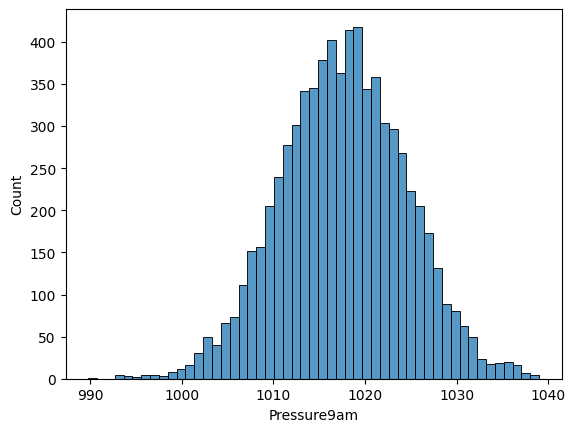

In [76]:
sns.histplot(df['Pressure9am'])

In [77]:
mean_Pressure9am=round(df[~df['Pressure9am'].isnull()]['Pressure9am'].mean(),1)
mean_Pressure9am

1017.6

In [78]:
df['Pressure9am']=df['Pressure9am'].fillna(mean_Pressure9am)

# **`Pressure3pm`**

In [79]:
df['Pressure3pm'].unique()

array([1007.1, 1007.8, 1008.7, 1012.8, 1006. , 1005.4, 1008.2, 1010.1,
       1003.6, 1005.7, 1004.2,  993. , 1001.8, 1010.3, 1010.4, 1002.2,
       1009.7, 1017.1, 1014.8, 1008.1, 1007.6, 1001.7, 1003.4, 1005.1,
       1003.2, 1013.1, 1009.2, 1006.7, 1002.7, 1010.9, 1013.7, 1006.8,
       1012.1, 1006.9, 1012.7, 1017.4, 1016.2, 1010.6, 1004.8, 1005.9,
        997.8, 1003.9, 1014.6, 1014.1, 1011.6, 1011.8, 1010.2, 1010.5,
       1007.4, 1004.7, 1002.6, 1005. , 1003.8, 1006.5, 1008.5, 1011.1,
       1017.3, 1019.7, 1016.4, 1013.8, 1013.5, 1007.5, 1004.5, 1010.8,
       1012.4, 1013.4, 1015. , 1012.6, 1004.6, 1009. , 1012. , 1014.7,
       1015.9, 1018. , 1018.9, 1008. , 1013.2, 1013.9, 1013.6, 1014.4,
       1019.2, 1017.2, 1020.7, 1020.6, 1019.1, 1019.5, 1019.4, 1018.4,
       1012.9, 1019.3, 1016.5, 1019.6, 1023.5, 1023.4, 1017.7, 1020.3,
       1020.8, 1018.7, 1009.8, 1016.8, 1020. , 1020.9, 1021.6, 1015.7,
       1002.4, 1000.9, 1003.3, 1018.3, 1021.5, 1023.2, 1024. , 1025.9,
      

<Axes: xlabel='Pressure3pm', ylabel='Count'>

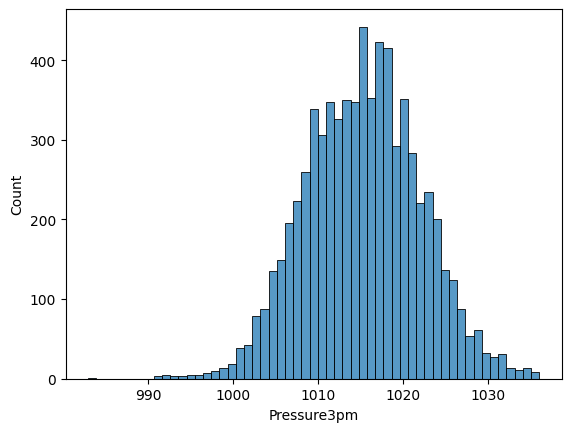

In [80]:
sns.histplot(df['Pressure3pm'])

In [81]:
mean_Pressure3pm=round(df[~df['Pressure3pm'].isnull()]['Pressure3pm'].mean(),1)
mean_Pressure3pm

1015.2

In [82]:
df['Pressure3pm']=df['Pressure3pm'].fillna(mean_Pressure3pm)

# **`Cloud9am`**

In [83]:
df['Cloud9am'].unique()

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.])

In [84]:
df['Cloud9am'].value_counts()

Cloud9am
7.0    1418
1.0    1038
8.0    1015
0.0     554
6.0     551
5.0     414
3.0     384
2.0     357
4.0     273
Name: count, dtype: int64

<Axes: xlabel='Cloud9am', ylabel='Count'>

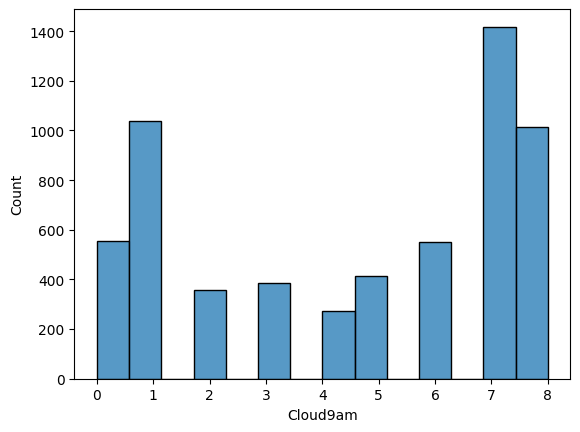

In [85]:
sns.histplot(df['Cloud9am'])

In [86]:
mean_Cloud9am=round(df[~df['Cloud9am'].isnull()]['Cloud9am'].mean(),1)
median_Cloud9am=df[~df['Cloud9am'].isnull()]['Cloud9am'].median()

In [87]:
[mean_Cloud9am,median_Cloud9am]

[4.6, 5.0]

In [88]:
df['Cloud9am']=df['Cloud9am'].fillna(0)

In [89]:
df['Cloud9am'].value_counts()

Cloud9am
0.0    2975
7.0    1418
1.0    1038
8.0    1015
6.0     551
5.0     414
3.0     384
2.0     357
4.0     273
Name: count, dtype: int64

In [90]:
df['Cloud9am']=df['Cloud9am'].replace(0,median_Cloud9am)

<Axes: xlabel='Cloud9am', ylabel='Count'>

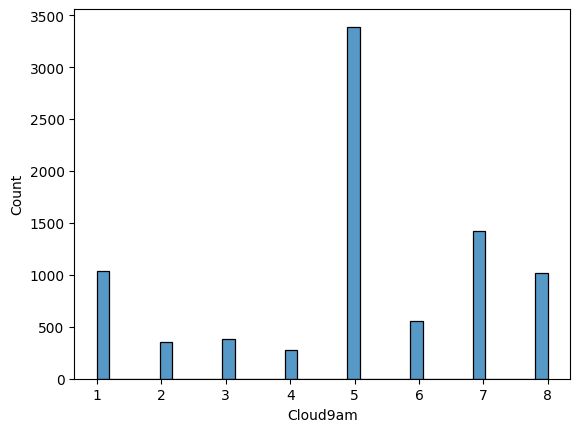

In [91]:
sns.histplot(df['Cloud9am'])

# **`Cloud3pm`**

In [92]:
df['Cloud3pm'].value_counts()

Cloud3pm
7.0    1294
1.0    1077
8.0     863
6.0     597
5.0     522
2.0     508
3.0     411
4.0     351
0.0     347
Name: count, dtype: int64

In [93]:
df['Cloud3pm'].unique()

array([nan,  2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.])

In [94]:
mean_Cloud3pm=round(df[~df['Cloud3pm'].isnull()]['Cloud3pm'].mean(),1)
median_Cloud3pm=df[~df['Cloud3pm'].isnull()]['Cloud3pm'].median()

In [95]:
[mean_Cloud3pm,median_Cloud3pm]

[4.5, 5.0]

In [96]:
df['Cloud3pm']=df['Cloud3pm'].fillna(0)

In [97]:
df['Cloud3pm']=df['Cloud3pm'].replace(0,median_Cloud3pm)

<Axes: xlabel='Cloud3pm', ylabel='Count'>

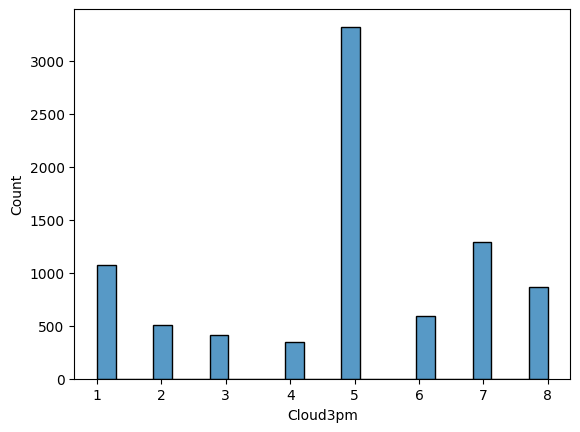

In [98]:
sns.histplot(df['Cloud3pm'])

# **`Temp9am`**

In [99]:
df['Temp9am'].value_counts()

Temp9am
14.8    77
18.0    73
18.3    71
17.5    69
20.6    68
        ..
2.5      1
2.0      1
3.4      1
5.2      1
30.2     1
Name: count, Length: 304, dtype: int64

In [100]:
sorted(df['Temp9am'].unique())[0]

1.9

<Axes: xlabel='Temp9am', ylabel='Count'>

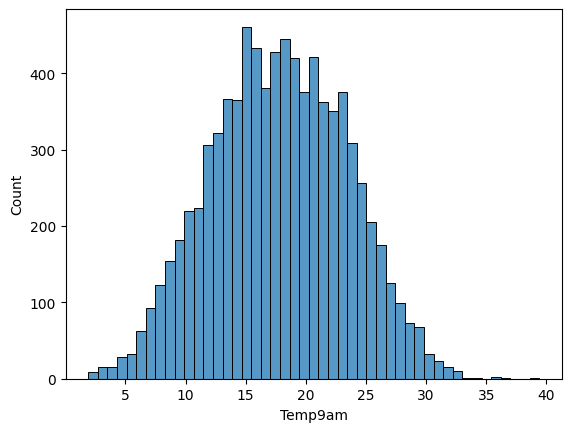

In [101]:
sns.histplot(df['Temp9am'])

In [102]:
mean_Temp9am=round(df[~df['Temp9am'].isnull()]['Temp9am'].mean(),1)
mean_Temp9am

17.8

In [103]:
df['Temp9am']=df['Temp9am'].fillna(mean_Temp9am)

# **`Temp3pm`**

In [104]:
df['Temp3pm'].unique()

array([21.8, 24.3, 23.2, 26.5, 29.7, 28.9, 24.6, 25.5, 30.2, 28.2, 28.8,
       17. , 15.8, 19.8, 23.5, 26.2, 18.1, 21.5, 21. , 27.3, 31.6, 30.8,
       29. , 31.2, 33. , 32.1, 26.1, 18.2, 22.7, 25.7, 22.1, 33.9, 34.4,
       36.8, 38.4, 27.6, 26.6, 29.3, 30. , 33.2, 35.7, 41.5, 27.1, 25.8,
       30.5, 37.7, 36.1, 33.1, 36.5, 36.2, 39.2, 40.1, 41.2, 42. , 41.9,
       37.1, 35.2, 39.7, 41.6, 43.4, 38.5, 29.4, 24.9, 17.3, 28.5, 29.2,
       29.5, 27. , 30.7, 32.7, 26.8, 29.8, 31.3, 33.4, 28.6, 33.6, 28.1,
       21.9, 21.4, 22. , 29.6, 18.8, 23.8, 19.7, 18.3, 20.5, 23.9, 27.2,
       32.6, 33.5, 31.4, 19.6, 27.7, 29.9, 30.9, 27.4, 20.3, 21.2, 20.9,
       21.6, 25. , 24.4, 23.1, 18.9, 19.4, 22.9, 23.6, 21.3, 22.3, 22.6,
       15.1, 14.5, 11.6,  9.4, 14. , 12.1, 16.1, 16.3, 19.1, 18.5, 18.4,
       19.2, 20.2, 17.7, 18. , 14.6, 15.3, 15.9, 14.7, 18.7, 21.7, 20.8,
       19.5, 17.4, 15.6, 16.7, 16.8, 13.4, 13. , 16.5, 10.2, 11.5, 11.4,
        7.9,  9.7,  8.8, 15.5, 13.9, 15.4, 14.9, 16

In [105]:
sorted(df['Temp3pm'].value_counts())[0]

1

<Axes: xlabel='Temp3pm', ylabel='Count'>

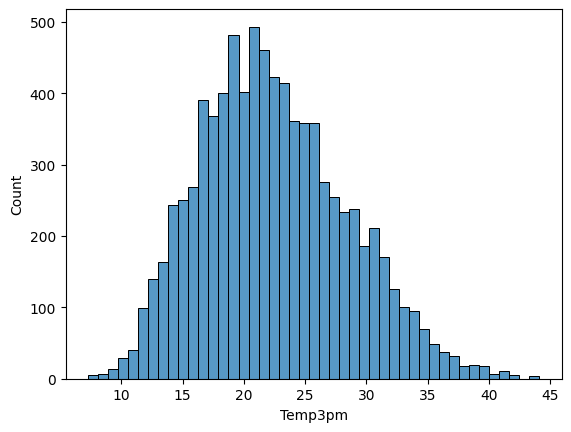

In [106]:
sns.histplot(df['Temp3pm'])

In [107]:
mean_Temp3pm=round(df[~df['Temp3pm'].isnull()]['Temp3pm'].mean(),1)
mean_Temp3pm

22.4

In [108]:
df['Temp3pm']=df['Temp3pm'].fillna(mean_Temp3pm)

# **`RainToday`**

In [109]:
df['RainToday'].value_counts()

RainToday
No     6195
Yes    1990
Name: count, dtype: int64

In [110]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [111]:
mode_RainToday=df['RainToday'].mode()[0]
mode_RainToday

'No'

In [112]:
df['RainToday']=df['RainToday'].fillna(mode_RainToday)

In [113]:
df['RainToday'].value_counts()

RainToday
No     6435
Yes    1990
Name: count, dtype: int64

# **`RainTomorrow`**

In [114]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     6195
Yes    1991
Name: count, dtype: int64

In [115]:
mode_RainTomorrow=df['RainTomorrow'].mode()[0]
mode_RainTomorrow

'No'

In [116]:
df['RainTomorrow']=df['RainTomorrow'].fillna(mode_RainTomorrow)

In [117]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Successfuly filled all the null and Nan values.

# **Feature Engineering**

In [118]:
df.sample(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4176,2017-03-05,Williamtown,19.4,23.3,14.2,3.1,4.0,SW,48.0,NW,...,95.0,83.0,1010.4,1008.7,8.0,8.0,19.6,22.6,Yes,No
3655,2009-07-07,Wollongong,8.3,13.9,2.7,3.1,4.0,S,46.0,SSW,...,62.0,63.0,1025.4,1024.9,5.0,7.0,11.6,13.3,No,Yes


In [119]:
df['Date'].dtype

dtype('O')

In [120]:
# cjanhing from object to date time format
df['Date']=pd.to_datetime(df['Date'])

In [121]:
df['Date'].dtype

dtype('<M8[ns]')

In [122]:
# extracting years and months
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8425 non-null   datetime64[ns]
 1   Location       8425 non-null   object        
 2   MinTemp        8425 non-null   float64       
 3   MaxTemp        8425 non-null   float64       
 4   Rainfall       8425 non-null   float64       
 5   Evaporation    8425 non-null   float64       
 6   Sunshine       8425 non-null   float64       
 7   WindGustDir    8425 non-null   object        
 8   WindGustSpeed  8425 non-null   float64       
 9   WindDir9am     8425 non-null   object        
 10  WindDir3pm     8425 non-null   object        
 11  WindSpeed9am   8425 non-null   float64       
 12  WindSpeed3pm   8425 non-null   float64       
 13  Humidity9am    8425 non-null   float64       
 14  Humidity3pm    8425 non-null   float64       
 15  Pressure9am    8425 n

In [124]:
df['Year'].unique()

array([2008, 2009, 2010, 2011, 2013, 2014, 2015, 2016, 2017, 2012],
      dtype=int32)

In [125]:
df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [126]:
df.shape

(8425, 25)

In [127]:
copy_df=df.copy()

In [128]:
copy_df.shape

(8425, 25)

# **Label Encoding**

In [129]:
pd.set_option('display.max_columns', None)
print(copy_df)

           Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0    2008-12-01   Albury     13.4     22.9       0.6          3.1       4.0   
1    2008-12-02   Albury      7.4     25.1       2.7          3.1       4.0   
2    2008-12-03   Albury     12.9     25.7       2.7          3.1       4.0   
3    2008-12-04   Albury      9.2     28.0       2.7          3.1       4.0   
4    2008-12-05   Albury     17.5     32.3       1.0          3.1       4.0   
...         ...      ...      ...      ...       ...          ...       ...   
8420 2017-06-21    Uluru      2.8     23.4       2.7          3.1       4.0   
8421 2017-06-22    Uluru      3.6     25.3       2.7          3.1       4.0   
8422 2017-06-23    Uluru      5.4     26.9       2.7          3.1       4.0   
8423 2017-06-24    Uluru      7.8     27.0       2.7          3.1       4.0   
8424 2017-06-25    Uluru     14.9     23.3       2.7          3.1       4.0   

     WindGustDir  WindGustSpeed WindDir9am WindDir3

In [130]:
copy_df=copy_df.drop(columns=['Date','Location','RainToday','Year','Month'])

In [131]:
copy_df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow'],
      dtype='object')

In [132]:
encoder_val={'RainTomorrow':{'Yes':1,'No':0}}

In [133]:
copy_df=copy_df.replace(encoder_val)

In [134]:
copy_df.sample(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
448,20.2,26.4,3.6,3.1,4.0,E,46.0,ENE,NW,4.0,9.0,83.0,70.0,1014.6,1011.9,8.0,8.0,21.3,24.2,0
3453,16.3,23.1,2.7,3.1,4.0,S,50.0,ENE,SE,9.0,9.0,74.0,80.0,1011.7,1008.7,5.0,7.0,20.6,20.9,0
5071,9.5,15.1,6.8,0.8,5.3,SSE,33.0,SW,S,9.0,22.0,64.0,54.0,1022.0,1021.3,7.0,6.0,11.9,13.5,0
8267,21.4,33.8,2.7,6.0,10.8,E,44.0,SE,N,9.0,9.0,79.0,40.0,1013.2,1009.7,2.0,3.0,25.9,33.1,0
5805,16.9,27.5,2.7,7.2,5.5,SSE,35.0,W,SW,11.0,9.0,77.0,52.0,1015.2,1012.0,5.0,5.0,18.3,26.7,0
5673,10.5,16.5,2.7,3.4,3.2,N,52.0,N,N,26.0,30.0,55.0,50.0,1019.8,1015.0,5.0,5.0,12.8,16.1,0
5216,9.0,14.0,2.7,2.8,4.0,SSE,46.0,S,SSE,20.0,28.0,83.0,74.0,1008.4,1011.8,5.0,5.0,10.5,13.5,0
973,5.9,23.2,2.7,2.2,10.0,N,30.0,WNW,N,7.0,17.0,63.0,35.0,1016.7,1012.3,1.0,1.0,16.3,22.3,0
2050,19.2,37.0,2.7,3.1,4.0,N,39.0,N,SE,13.7,9.0,79.0,55.0,1017.6,1015.2,1.0,5.0,23.0,32.0,1
6540,20.3,29.7,0.6,4.2,11.1,SE,26.0,SSE,E,9.0,13.0,72.0,61.0,1014.1,1010.9,2.0,1.0,26.3,28.0,0


# **One Hot Encoding**

In [135]:
copy_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,3.1,4.0,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0
1,7.4,25.1,2.7,3.1,4.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0
2,12.9,25.7,2.7,3.1,4.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0
3,9.2,28.0,2.7,3.1,4.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0
4,17.5,32.3,1.0,3.1,4.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


In [136]:
copy_df=copy_df.drop(columns=['WindGustDir','WindDir9am','WindDir3pm'])

In [137]:
copy_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,3.1,4.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0
1,7.4,25.1,2.7,3.1,4.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0
2,12.9,25.7,2.7,3.1,4.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0
3,9.2,28.0,2.7,3.1,4.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0
4,17.5,32.3,1.0,3.1,4.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


# **Viewing Imbalanced Dataset**

<Axes: xlabel='RainTomorrow', ylabel='count'>

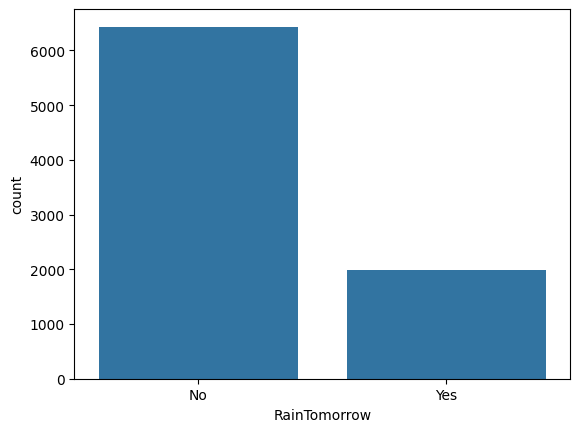

In [138]:
sns.countplot(x=df['RainTomorrow'])

The Data is heavily imbalanced, we need to balance it to get our good accuracy and to avoid overfitting.

# **Handling Class Imbalance**

# **SMOTE -**  Synthetic Minority Oversampling Technique

In [139]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(copy_df[(i for i in list(copy_df.describe(include='all').columns) if i != 'RainTomorrow')], df['RainTomorrow'])

print('Original unbalanced dataset shape', len(copy_df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 8425
Resampled balanced dataset shape 12868


In [140]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(copy_df.describe(include='all').columns) if i != 'RainTomorrow'))


In [141]:
#adding target variable to new created dataframe
balanced_df['RainTomorrow'] = y_smote

<Axes: xlabel='RainTomorrow', ylabel='count'>

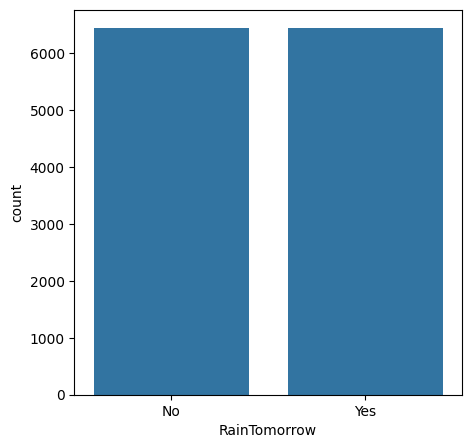

In [142]:
#check for class imbalance
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.countplot( x=balanced_df['RainTomorrow'],data=balanced_df)

In [143]:
balanced_df.shape

(12868, 17)

In [144]:
balanced_df['RainTomorrow'].value_counts()

RainTomorrow
No     6434
Yes    6434
Name: count, dtype: int64

In [145]:
balanced_df['RainTomorrow']=balanced_df['RainTomorrow'].replace({'Yes':1,'No':0})

# **Analyzing MultiCollineraity using Heatmap**

<Axes: >

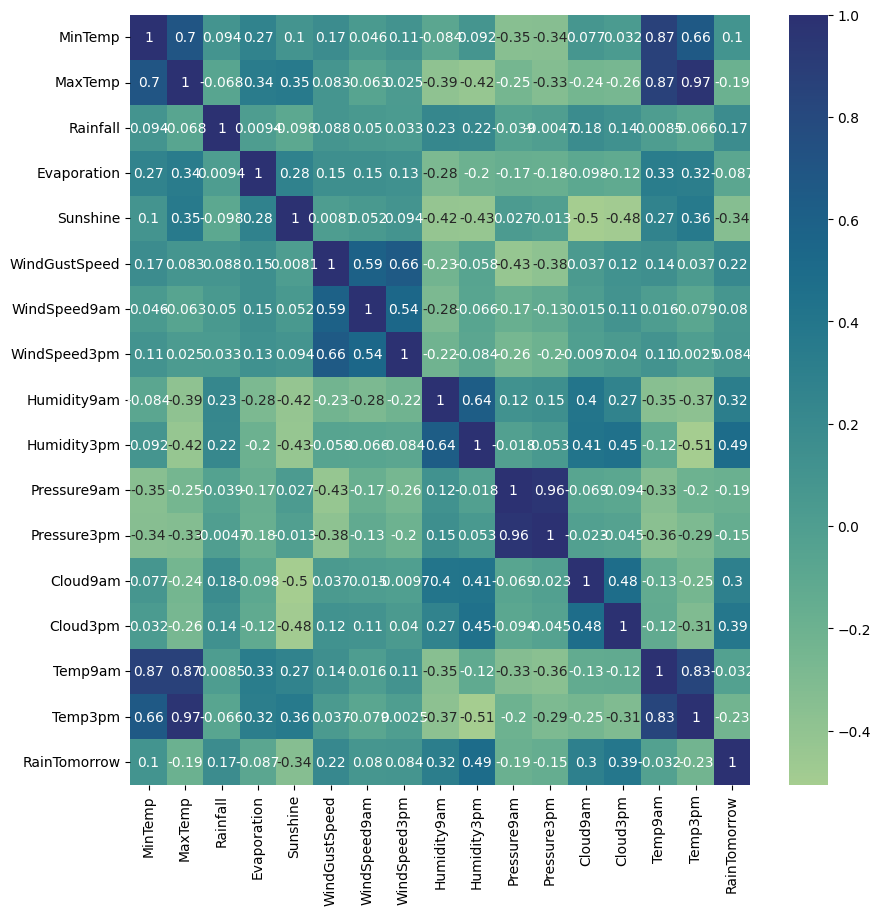

In [146]:
plt.figure(figsize=(10,10))
sns.heatmap(balanced_df.corr(),annot=True,cmap="crest")

In [147]:
# removing columns having highest highest collinearity
balanced_df=balanced_df.drop(columns=['MaxTemp','Pressure9am'])

In [148]:
balanced_df.head()

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,0.6,3.1,4.0,44.0,20.0,24.0,71.0,22.0,1007.1,8.0,5.0,16.9,21.8,0
1,7.4,2.7,3.1,4.0,44.0,4.0,22.0,44.0,25.0,1007.8,5.0,5.0,17.2,24.3,0
2,12.9,2.7,3.1,4.0,46.0,19.0,26.0,38.0,30.0,1008.7,5.0,2.0,21.0,23.2,0
3,9.2,2.7,3.1,4.0,24.0,11.0,9.0,45.0,16.0,1012.8,5.0,5.0,18.1,26.5,0
4,17.5,1.0,3.1,4.0,41.0,7.0,20.0,82.0,33.0,1006.0,7.0,8.0,17.8,29.7,0


In [149]:
X=balanced_df.drop(columns=['RainTomorrow'])
y=balanced_df['RainTomorrow']

In [150]:
X.shape

(12868, 14)

In [151]:
y.shape

(12868,)

# **Data Transformation**

In [152]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# **Train Test Splitting**

In [153]:
#importing libraries for splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [154]:
X_train.shape

(10294, 14)

In [155]:
X_test.shape

(2574, 14)

# **Baseline Model Implemntation**

# **Logistic Regression Model**

In [156]:
#importing logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

In [157]:
#fitting data into Logistic Regression
logi = LogisticRegression()
logi.fit(X_train,y_train)

LogisticRegression()

In [158]:
#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

In [159]:
#getting all scores for Logistic Regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 3)
roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.753
The accuracy on test data is  0.753
The precision on test data is  0.721
The recall on test data is  0.772
The f1 on test data is  0.745
The roc_score on test data is  0.754


[[1005  276]
 [ 361  932]]


[Text(0, 0.5, 'No Rain'), Text(0, 1.5, 'Rain Tomorrow')]

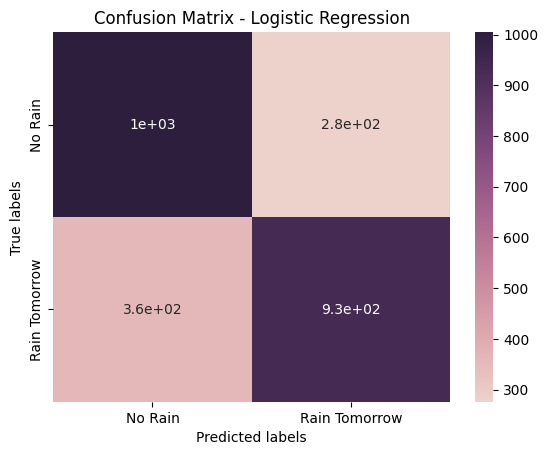

In [160]:
# Get the confusion matrix
labels = ['No Rain', 'Rain Tomorrow']
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax, cmap=sns.cubehelix_palette(as_cmap=True))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Decision Tree Classifier**

In [161]:
# importing decisiontree
from sklearn.tree import DecisionTreeClassifier

In [162]:
# creating object anf fitting the model
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [163]:
# class predicting y
y_pred_dtc=dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [164]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 3)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  0.999
The accuracy on test data is  0.89
The precision on test data is  0.893
The recall on test data is  0.888
The f1 on test data is  0.891
The roc_score on test data is  0.89


[[1135  146]
 [ 138 1155]]


[Text(0, 0.5, 'No Rain'), Text(0, 1.5, 'Rain Tomorrow')]

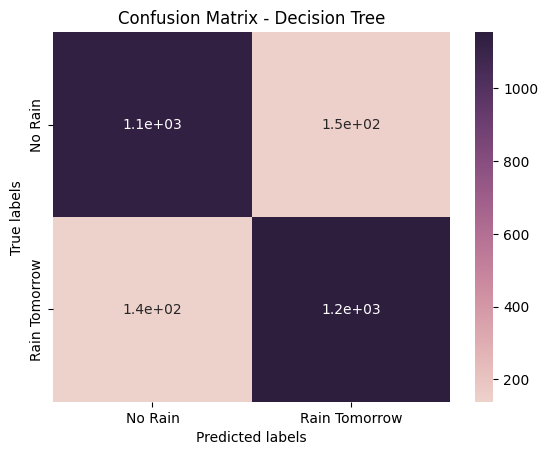

In [165]:
# Get the confusion matrix
labels = ['No Rain', 'Rain Tomorrow']
cm_logi = confusion_matrix(y_test, y_pred_dtc )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax, cmap=sns.cubehelix_palette(as_cmap=True))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Random Forest Classifier**

In [166]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [167]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [168]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [169]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  0.998
The accuracy on test data is  0.944
The precision on test data is  0.94
The recall on test data is  0.948
The f1 on test data is  0.944
The roc_score on test data is  0.944


[[1214   67]
 [  78 1215]]


[Text(0, 0.5, 'No Rain'), Text(0, 1.5, 'Rain Tomorrow')]

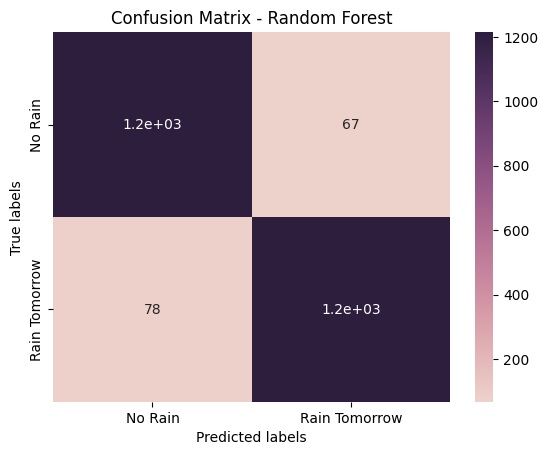

In [170]:
# Get the confusion matrix
labels = ['No Rain', 'Rain Tomorrow']
cm_logi = confusion_matrix(y_test, y_pred_rfc )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax, cmap=sns.cubehelix_palette(as_cmap=True))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Gradient Boosting**

In [171]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [172]:
#fitting data into Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [173]:
#class prediction of y
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)

In [174]:
#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train), 3)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test), 3)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test), 3)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test), 3)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test), 3)
roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  0.864
The accuracy on test data is  0.866
The precision on test data is  0.846
The recall on test data is  0.882
The f1 on test data is  0.864
The roc_score on test data is  0.867


[[1135  146]
 [ 199 1094]]


[Text(0, 0.5, 'No Rain'), Text(0, 1.5, 'Rain Tomorrow')]

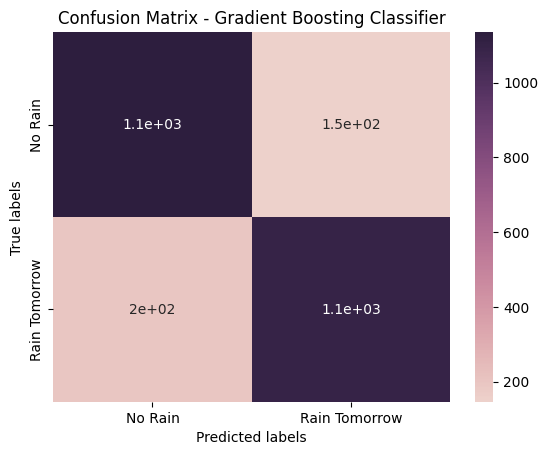

In [175]:
# Get the confusion matrix for Gradient Boosting Classifier
labels = ['No Rain', 'Rain Tomorrow']
cm_gbc = confusion_matrix(y_test, y_pred_gbc )
print(cm_gbc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True, ax = ax, cmap=sns.cubehelix_palette(as_cmap=True))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **XG Boosting**

In [176]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier

In [177]:
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [178]:
#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)

In [179]:
#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test), 3)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test), 3)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test), 3)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test), 3)
roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  0.99
The accuracy on test data is  0.938
The precision on test data is  0.924
The recall on test data is  0.951
The f1 on test data is  0.937
The roc_score on test data is  0.938


[[1219   62]
 [  98 1195]]


[Text(0, 0.5, 'No Rain'), Text(0, 1.5, 'Rain Tomorrow')]

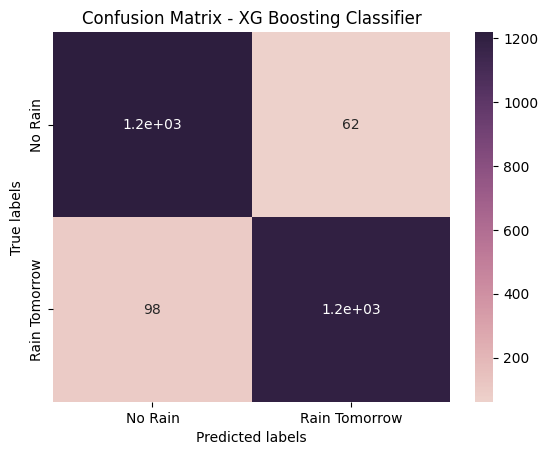

In [180]:
# Get the confusion matrix for Gradient Boosting Classifier
labels = ['No Rain', 'Rain Tomorrow']
cm_gbc = confusion_matrix(y_test, y_pred_xgb )
print(cm_gbc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True, ax = ax, cmap=sns.cubehelix_palette(as_cmap=True))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XG Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **BaseLine Model Comparison**

In [181]:
all_lassifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_logi, train_accuracy_dtc, train_accuracy_rfc, train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_logi, accuracy_dtc, accuracy_rfc, accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_logi, precision_score_dtc, precision_score_rfc, precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_logi, recall_score_dtc, recall_score_rfc,recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_logi, f1_score_dtc, f1_score_rfc, f1_score_gbc, f1_score_xgb]
all_auc_score = [roc_score_logi, roc_score_dtc, roc_score_rfc,roc_score_gbc, roc_score_xgb]

In [182]:
compare_df = pd.DataFrame({'Classifier':all_lassifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})

In [183]:
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.753,0.753,0.721,0.772,0.745,0.754
1,Decision Tree,0.999,0.890,0.893,0.888,0.891,0.890
2,Random Forest,0.998,0.944,0.940,0.948,0.944,0.944
3,Gradient Boosting,0.864,0.866,0.846,0.882,0.864,0.867
4,XG Boosting,0.990,0.938,0.924,0.951,0.937,0.938


In [184]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
2,Random Forest,0.998,0.944,0.940,0.948,0.944,0.944
4,XG Boosting,0.990,0.938,0.924,0.951,0.937,0.938
1,Decision Tree,0.999,0.890,0.893,0.888,0.891,0.890
3,Gradient Boosting,0.864,0.866,0.846,0.882,0.864,0.867
0,Logistic Regression,0.753,0.753,0.721,0.772,0.745,0.754


# **Combined ROC curve for all the models**

In [185]:
#importing roc curve
from sklearn.metrics import roc_curve

In [186]:
#probabilty prediction of y for all model
y_pred_proba_logi = logi.predict_proba(X_test)[:,1]
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

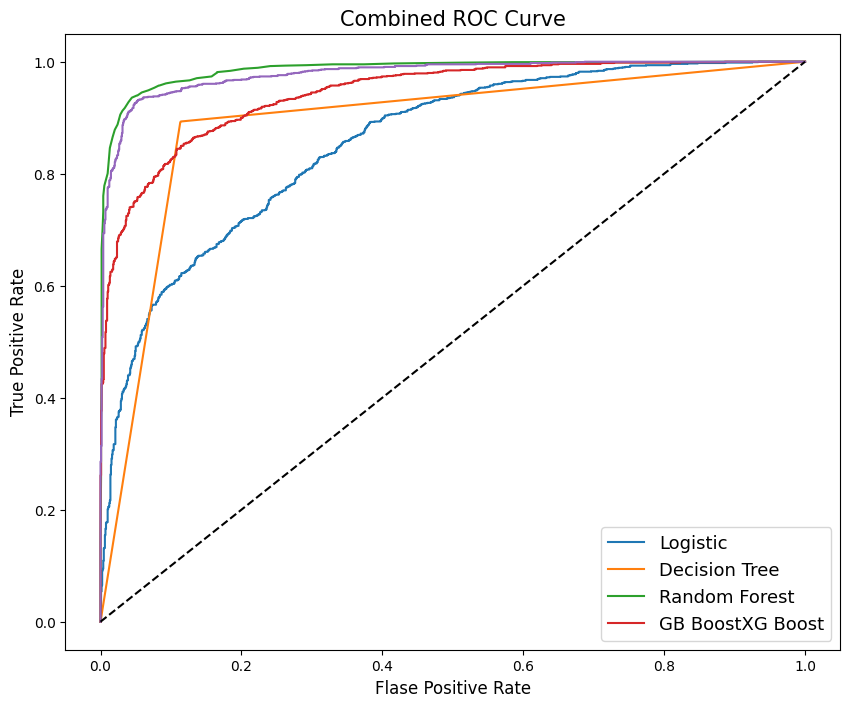

In [187]:
fig = plt.figure(figsize=(10,8))

fpr_logi, tpr_logi, _logi = roc_curve(y_test,  y_pred_proba_logi)
fpr_dtc, tpr_dtc, _dtc = roc_curve(y_test,  y_pred_proba_dtc)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)
fpr_gbc, tpr_gbc, _gbc = roc_curve(y_test,  y_pred_proba_gbc)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,  y_pred_proba_xgb)

plt.plot(fpr_logi, tpr_logi)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_gbc, tpr_gbc)
plt.plot(fpr_xgb, tpr_xgb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("Flase Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic", "Decision Tree", "Random Forest", "GB Boost" "XG Boost"], prop={'size':13}, loc='lower right' )

# **Feature Importance On Random Forest Model**

In [188]:
features = list(i for i in list(balanced_df.describe(include='all').columns) if i != 'RainTomorrow')
features

['MinTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [189]:
feature_importances_rfc = rfc.feature_importances_

In [190]:
feature_importances_rfc_df = pd.Series(feature_importances_rfc, index=features)

In [191]:
feature_importances_rfc_df.sort_values(ascending=False)

Humidity3pm      0.158837
Cloud3pm         0.117115
Rainfall         0.094322
Sunshine         0.070402
Cloud9am         0.069252
WindGustSpeed    0.068995
Humidity9am      0.065434
Pressure3pm      0.064336
Temp3pm          0.055190
MinTemp          0.050889
Temp9am          0.050561
WindSpeed3pm     0.049080
WindSpeed9am     0.043277
Evaporation      0.042311
dtype: float64

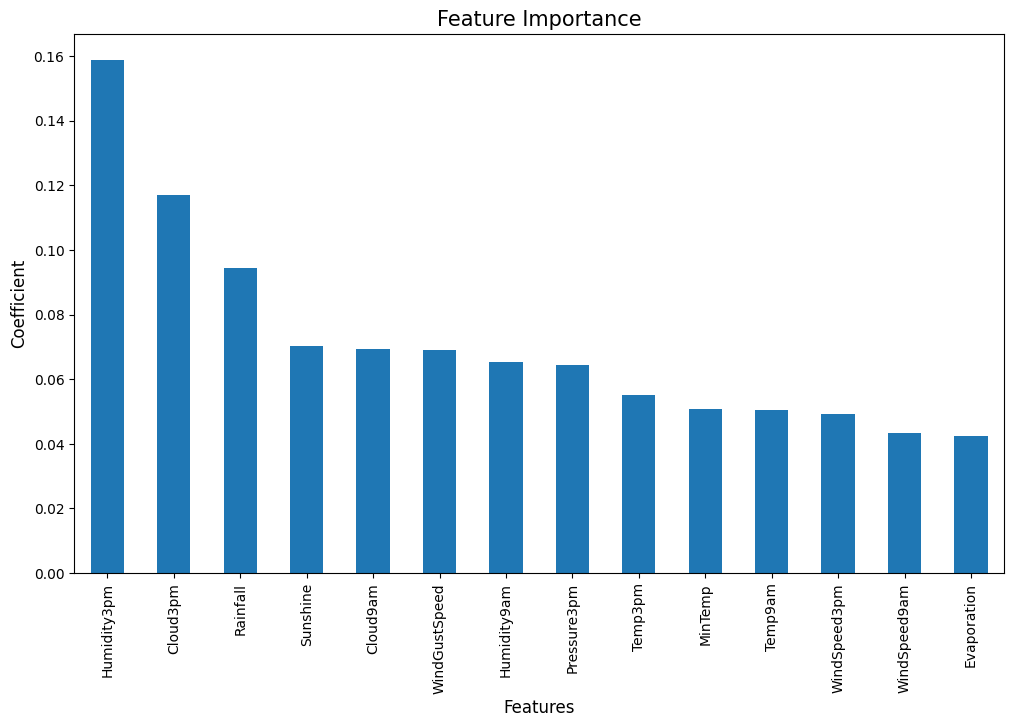

In [192]:
fig = plt.figure(figsize=(12,7))
feature_importances_rfc_df.nlargest(15).plot(kind='bar')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

`Humidity3pm` is the most important feature.

# **Cross Validation and Hyperparameter Tuning**

In [195]:
from sklearn.model_selection import GridSearchCV

# **Logistic Regression model**

In [198]:
penalties =['l1','l2','elasticnet','none']

# hyperparameter c
c=[0.001,0.1,0.5,1,5,10]

# hyperparameter grid
param_dict={'penalty':penalties,
            'max_iter':[100,1000,2000],
            'C': c}

In [199]:
# creating instance of logistic regression
logi = LogisticRegression()

# Grid search
logi_grid = GridSearchCV(estimator=logi,
                         param_grid=param_dict,
                         cv=5,
                         verbose=3,n_jobs=-1,scoring='roc_auc')

# fitting model
logi_grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 0.5, 1, 5, 10],
                         'max_iter': [100, 1000, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc', verbose=3)

In [200]:
logi_grid.best_estimator_

LogisticRegression(C=1)

In [201]:
logi_grid.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [202]:
logi_optimal_model=logi_grid.best_estimator_

In [230]:
#class prediction of y on train and test
y_pred_logi_grid = logi_optimal_model.predict(X_test)
y_train_pred_logi_grid = logi_optimal_model.predict(X_train)

In [231]:
#getting all scores for Logistic Regression after CV and Hyperparameter Tunning
train_accuracy_logi_grid = round(accuracy_score(y_train_pred_logi_grid,y_train), 3)
accuracy_logi_grid = round(accuracy_score(y_pred_logi_grid,y_test), 3)
precision_score_logi_grid = round(precision_score(y_pred_logi_grid, y_test), 3)
recall_score_logi_grid = round(recall_score(y_pred_logi_grid,y_test), 3)
f1_score_logi_grid = round(f1_score(y_pred_logi_grid,y_test), 3)
auc_logi_grid = round(roc_auc_score(y_pred_logi_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi_grid)
print("The accuracy on test data is ", accuracy_logi_grid)
print("The precision on test data is ", precision_score_logi_grid)
print("The recall on test data is ", recall_score_logi_grid)
print("The f1 on test data is ", f1_score_logi_grid)
print("The auc on test data is ", auc_logi_grid)

The accuracy on train data is  0.753
The accuracy on test data is  0.753
The precision on test data is  0.721
The recall on test data is  0.772
The f1 on test data is  0.745
The auc on test data is  0.754


# **Decision Trees**

In [232]:
# The maximum depth of the tree
depth_of_tree = [20,25,30]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [233]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
dtc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='roc_auc', verbose=3)

In [234]:
dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=30, min_samples_leaf=40,
                       min_samples_split=0.01)

In [235]:
dtc_grid.best_params_

{'max_depth': 30, 'min_samples_leaf': 40, 'min_samples_split': 0.01}

In [236]:
dtc_optimal_model = dtc_grid.best_estimator_

In [237]:
#class prediction of y on train and test
y_pred_dtc_grid=dtc_optimal_model.predict(X_test)
y_train_pred_dtc_grid=dtc_optimal_model.predict(X_train)

In [238]:
#getting all scores for decision tree after CV and Hyperparameter Tunning
train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train), 3)
accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test), 3)
precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid,y_test), 3)
recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test), 3)
f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test), 3)
auc_dtc_grid = round(roc_auc_score(y_pred_dtc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc_grid)
print("The accuracy on test data is ", accuracy_dtc_grid)
print("The precision on test data is ", precision_score_dtc_grid)
print("The recall on test data is ", recall_score_dtc_grid)
print("The f1 on test data is ", f1_score_dtc_grid)
print("The auc on test data is ", auc_dtc_grid)

The accuracy on train data is  0.828
The accuracy on test data is  0.815
The precision on test data is  0.78
The recall on test data is  0.84
The f1 on test data is  0.809
The auc on test data is  0.816


# **Random Forest**

In [207]:
# number of tress
n_estimators=[100,150,200]

# max depth of trees
max_depth=[10,20,30]

# minimum number of samples required to split a node
min_samples_split=[50,100,200]

# min number of samples required at each leaf
min_samples_leaf=[40,50]

# hyper parameter grid
param_dict={'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            }

In [208]:
# creating insatnce for random forest classifier
rfc= RandomForestClassifier()

# grid search
rfc_grid=GridSearchCV(estimator=rfc,
                      param_grid=param_dict,
                      cv=5,
                      verbose=3,
                      scoring='roc_auc',
                      n_jobs=-1)

# fitting the model
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 200],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc', verbose=3)

In [209]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=200)

In [210]:
rfc_grid.best_params_

{'max_depth': 30,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 200}

In [211]:
rfc_optimal_model = rfc_grid.best_estimator_

In [212]:
#class prediction of y on train and test
y_pred_rfc_grid=rfc_optimal_model.predict(X_test)
y_train_pred_rfc_grid=rfc_optimal_model.predict(X_train)

In [213]:
#getting all scores for Random Forest Classifier after CV and Hyperparameter Tunning
train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train), 3)
accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test), 3)
precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid,y_test), 3)
recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test), 3)
f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test), 3)
auc_rfc_grid = round(roc_auc_score(y_pred_rfc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc_grid)
print("The accuracy on test data is ", accuracy_rfc_grid)
print("The precision on test data is ", precision_score_rfc_grid)
print("The recall on test data is ", recall_score_rfc_grid)
print("The f1 on test data is ", f1_score_rfc_grid)
print("The auc on test data is ", auc_rfc_grid)

The accuracy on train data is  0.856
The accuracy on test data is  0.851
The precision on test data is  0.845
The recall on test data is  0.856
The f1 on test data is  0.85
The auc on test data is  0.851


# **Gradient Boosting**

In [214]:
# to shrinks the contribution of each tree by learning_rate
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'learning_rate': learning_rates,
              'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [216]:
from sklearn.model_selection import RandomizedSearchCV

# Create an instance of the RandomForestClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Grid search
gbc_grid = RandomizedSearchCV(estimator=gbc,
                       param_distributions = param_dict,
                       cv = 2, verbose=2, scoring='roc_auc')
# fitting model
gbc_grid.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END learning_rate=0.1, max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   9.8s
[CV] END learning_rate=0.1, max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   5.3s
[CV] END learning_rate=0.05, max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=  15.6s
[CV] END learning_rate=0.05, max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=  19.0s
[CV] END learning_rate=0.05, max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=  10.7s
[CV] END learning_rate=0.05, max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=  12.0s
[CV] END learning_rate=1, max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=  13.9s
[CV] END learning_rate=1, max_depth=20, min_samples_leaf=50, min_samples_spl

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [100, 150, 200]},
                   scoring='roc_auc', verbose=2)

In [217]:
gbc_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=20,
                           min_samples_leaf=40, min_samples_split=100,
                           n_estimators=200, random_state=42)

In [218]:
gbc_grid.best_params_

{'n_estimators': 200,
 'min_samples_split': 100,
 'min_samples_leaf': 40,
 'max_depth': 20,
 'learning_rate': 0.05}

In [219]:
gbc_optimal_model = gbc_grid.best_estimator_

In [220]:
#class prediction of y on train and test
y_pred_gbc_grid=gbc_optimal_model.predict(X_test)
y_train_pred_gbc_grid=gbc_optimal_model.predict(X_train)

In [221]:
#getting all scores for Gradient Boosting after CV and Hyperparameter Tunning
train_accuracy_gbc_grid = round(accuracy_score(y_train_pred_gbc_grid,y_train), 3)
accuracy_gbc_grid = round(accuracy_score(y_pred_gbc_grid,y_test), 3)
precision_score_gbc_grid = round(precision_score(y_pred_gbc_grid,y_test), 3)
recall_score_gbc_grid = round(recall_score(y_pred_gbc_grid,y_test), 3)
f1_score_gbc_grid = round(f1_score(y_pred_gbc_grid,y_test), 3)
auc_gbc_grid = round(roc_auc_score(y_pred_gbc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc_grid)
print("The accuracy on test data is ", accuracy_gbc_grid)
print("The precision on test data is ", precision_score_gbc_grid)
print("The recall on test data is ", recall_score_gbc_grid)
print("The f1 on test data is ", f1_score_gbc_grid)
print("The auc on test data is ", auc_gbc_grid)

The accuracy on train data is  0.998
The accuracy on test data is  0.941
The precision on test data is  0.93
The recall on test data is  0.951
The f1 on test data is  0.94
The auc on test data is  0.941


# **XG Boosting**

In [222]:
# Hyperparameter Grid
param_dict = {'learning_rate': [0.15, 0.1, 0.05],
              'n_estimators' : [200, 250],
              'max_depth' : [15,20,25],
              'min_child_weight' : [1,3],
              'gamma': [0.3, 0.2, 0.1],
              'min_samples_leaf' : [40, 50]}

In [223]:
# Create an instance of the RandomForestClassifier
xgb = XGBClassifier()

# Grid search
xgb_grid = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict,
                       n_jobs=-1, n_iter=5, cv = 3,
                       verbose=2, scoring='roc_auc')
# fitting model
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:44:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.3, 0.2, 0.1],
                                        'learning_rate': [0.15, 0.1, 0.05],
                                        'max_depth': [15, 20, 25],
                                        'min_child_weight': [1, 3],
                                        'min_samples_leaf': [40, 50],
                                        'n_estimators': [200, 250]},
                   scoring='roc_auc', verbose=2)

In [224]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=1, min_samples_leaf=50, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [225]:
xgb_grid.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 50,
 'min_child_weight': 1,
 'max_depth': 20,
 'learning_rate': 0.05,
 'gamma': 0.2}

In [226]:
xgb_optimal_model = xgb_grid.best_estimator_

In [227]:
#class prediction of y on train and test
y_pred_xgb_grid=xgb_optimal_model.predict(X_test)
y_train_pred_xgb_grid=xgb_optimal_model.predict(X_train)

In [228]:
#getting all scores for XG Boosting after CV and Hyperparameter Tunning
train_accuracy_xgb_grid = round(accuracy_score(y_train_pred_xgb_grid,y_train), 3)
accuracy_xgb_grid = round(accuracy_score(y_pred_xgb_grid,y_test), 3)
precision_score_xgb_grid = round(precision_score(y_pred_xgb_grid,y_test), 3)
recall_score_xgb_grid = round(recall_score(y_pred_xgb_grid,y_test), 3)
f1_score_xgb_grid = round(f1_score(y_pred_xgb_grid,y_test), 3)
auc_xgb_grid = round(roc_auc_score(y_pred_xgb_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb_grid)
print("The accuracy on test data is ", accuracy_xgb_grid)
print("The precision on test data is ", precision_score_xgb_grid)
print("The recall on test data is ", recall_score_xgb_grid)
print("The f1 on test data is ", f1_score_xgb_grid)
print("The auc on test data is ", auc_xgb_grid)

The accuracy on train data is  0.999
The accuracy on test data is  0.947
The precision on test data is  0.945
The recall on test data is  0.949
The f1 on test data is  0.947
The auc on test data is  0.947


# **Final Model Comparison**

In [239]:
grid_classifiers = ['Optimal Logistic Regression', 'Optimal Decision Tree', 'Optimal Random Forest', 'Optimal Gradient Boosting', 'Optimal XG Boosting']
grid_train_accuracy = [train_accuracy_logi_grid, train_accuracy_dtc_grid, train_accuracy_rfc_grid, train_accuracy_gbc_grid, train_accuracy_xgb_grid]
grid_test_accuracy = [accuracy_logi_grid, accuracy_dtc_grid, accuracy_rfc_grid, accuracy_gbc_grid, accuracy_xgb_grid]
grid_precision_score = [precision_score_logi_grid, precision_score_dtc_grid, precision_score_rfc_grid,precision_score_gbc_grid, precision_score_xgb_grid]
grid_recall_score = [recall_score_logi_grid, recall_score_dtc_grid, recall_score_rfc_grid,  recall_score_gbc_grid, recall_score_xgb_grid]
grid_f1_score = [f1_score_logi_grid, f1_score_dtc_grid, f1_score_rfc_grid, f1_score_gbc_grid, f1_score_xgb_grid]
grid_auc_score = [auc_logi_grid, auc_dtc_grid, auc_rfc_grid,  auc_gbc_grid, auc_xgb_grid]

In [240]:
grid_compare_df = pd.DataFrame({'Classifier':grid_classifiers, 'Train Accuracy': grid_train_accuracy, 'Test Accuracy': grid_test_accuracy, 'Precision': grid_precision_score, 'Recall': grid_recall_score, 'F1 Score': grid_f1_score , 'AUC': grid_auc_score})


In [241]:
all_comparision_df = pd.concat([compare_df, grid_compare_df]).reset_index()

In [242]:
all_comparision_df.drop('index', axis=1, inplace=True)

In [243]:
all_comparision_df.sort_values('AUC', axis=0, ascending=False, inplace=True)

In [244]:
all_comparision_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
9,Optimal XG Boosting,0.999,0.947,0.945,0.949,0.947,0.947
2,Random Forest,0.998,0.944,0.940,0.948,0.944,0.944
8,Optimal Gradient Boosting,0.998,0.941,0.930,0.951,0.940,0.941
4,XG Boosting,0.990,0.938,0.924,0.951,0.937,0.938
1,Decision Tree,0.999,0.890,0.893,0.888,0.891,0.890
3,Gradient Boosting,0.864,0.866,0.846,0.882,0.864,0.867
7,Optimal Random Forest,0.856,0.851,0.845,0.856,0.850,0.851
6,Optimal Decision Tree,0.828,0.815,0.780,0.840,0.809,0.816
0,Logistic Regression,0.753,0.753,0.721,0.772,0.745,0.754
5,Optimal Logistic Regression,0.753,0.753,0.721,0.772,0.745,0.754


# **Summary and conclusions**

* We trained 5 unique Machine Learning models using the training dataset, and the its respective performance was improved through hyperparameter tuning.

* We initially started with the `decision tree model`, mainly because it is easily explainable to the stakeholders, and its low training time.

* Once we were successfully able to fit a decision tree, it was necessary to improve the prediction accuracy, and reduce errors in the predictions.

* To achieve this, we fit a random forest model on the training data, and the final predictions showed less errors compared to that of decision tree model.

* To further improve the predictions of the model, we fit 2 boosting models namely; Gradient boosting machine (GBM) and Extreme gradient boost (XG Boost).
* The predictions obtained from these models showed errors in the same range, but the errors were lower than that of decision tree model.
* Plotted the ROC curve and it showed that `RandomForestClassifier` coverrs the highest area compared to other models.

* implemnted Hyper Parameter tuning to all the models.
* `Optimal Gradient Boosting` gave a good recall overall.
* since the criteria of selecting the best model i kept was `AUC` and **`Optimal XG Boosting`** gave the highest AUC of **94.7%**.

The `RandomForestClassifier ` model has the highest test accuracy , and the highest F1 score.


Final choice of model depends on:

* If it is absolutely necessary to have a model with the best test accuracy, then `RandomForestClassifier ` will be the best choice, since it has the highest test score than other models built.
* But when it comes to AUC `Optimal XG Boosting` beats all the model and hence we gave highest priority.
* But as discussed above, higher the model complexity, lower is the model explainability. Hence if the predictions must be explained to stakeholers, then XG Boost is not an ideal choice.
* In this case decision tree can be used, since they are easier to explain. By choosing a simpler model, we will be compromising with the model accuracy (Accuracy vs Interpretability tradeoff).
* `Humidity3pm` turned out to be most important feature of our final model.